# 🎮 Video Game Sales Analysis

As a sports and gaming enthusiast with a growing passion for data, this project was one of my personal highlights during my data analytics training. 
That's why I have deliberately revisited and rebuilt this project as a dedicated portfolio piece - separate from the original course version - to reflect my own approach, expanded scrope, and cleaner structure. 

Using a publicly available dataset, I explored what makes games commercially successful - across genres, regions, platforms, and over time.

From top-selling titles to regional prefenreces and long-term sales trends, the analysis blends curiosity, business insight, and technical skills in Python.

If you're interesting in the findings or are currently hiring in the data field - feel free to reach out! I'm open to opportunities and always happy to connect.

## 📁 1. Data Preparation 

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the video games sales dataset
url = 'https://gist.githubusercontent.com/zhonglism/f146a9423e2c975de8d03c26451f841e/raw/vgsales.csv'
video_games_df = pd.read_csv(url)
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
# Checking for missing values
video_games_df.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [7]:
video_games_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# Handling missing data
video_games_df['Publisher'] = video_games_df['Publisher'].fillna("Unknown")
video_games_df['Year'] = video_games_df['Year'].fillna("Unknown")

❗️ Missing values in the 'Year' column (~ 270 entries) and 'Publsiher' column (~ 60 entries) were replaced with "Unknown" to void data loss and maintain consistency during aggregations.

In [10]:
# Checking data types
video_games_df.dtypes

Rank              int64
Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [11]:
# Changing 'Year' datatype to numerical
video_games_df['Year'] = pd.to_numeric(video_games_df['Year'], errors='coerce')

## 2. Descriptive Analysis

📌 Number of games released per year

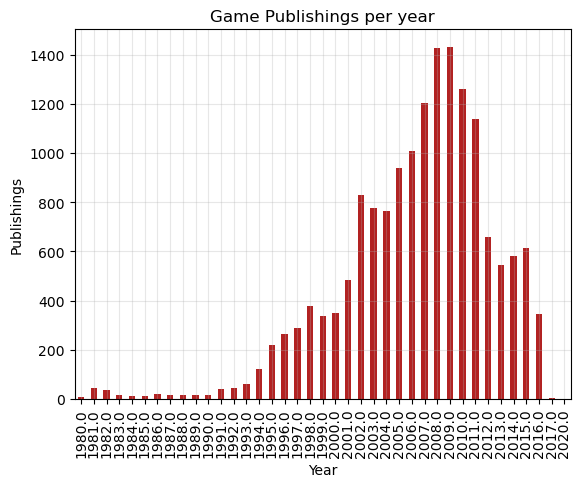

In [14]:
games_per_year = video_games_df['Year'].value_counts().sort_index()
games_per_year.plot(kind='bar', color='firebrick')
plt.title('Game Publishings per year')
plt.xlabel('Year')
plt.ylabel('Publishings')
plt.grid(True, alpha=0.3)
plt.show()

- The above plot shows a steady and in parts steap growth in annual game publishings up until 2009. 
- After that, we see a strong decline in yearly publishings, with the data from 2013 on a level of 2001.

🔮 **Future analysis**
- ...could dive into the following years and see if the market has re-established itself. 
- What in specific was behind the drop in publishings? 
- Did games not sell as expected?
- Did publishers leave the market?
- Or did the publishers' focus on fewer, top-tier publishings cause a shift within the market strategy?

📌 Top 10 platforms by number of published games

In [17]:
top_platforms = video_games_df['Platform'].value_counts().head(10).to_frame()
top_platforms

,count
Platform,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


📌 Distribution by platform and genre

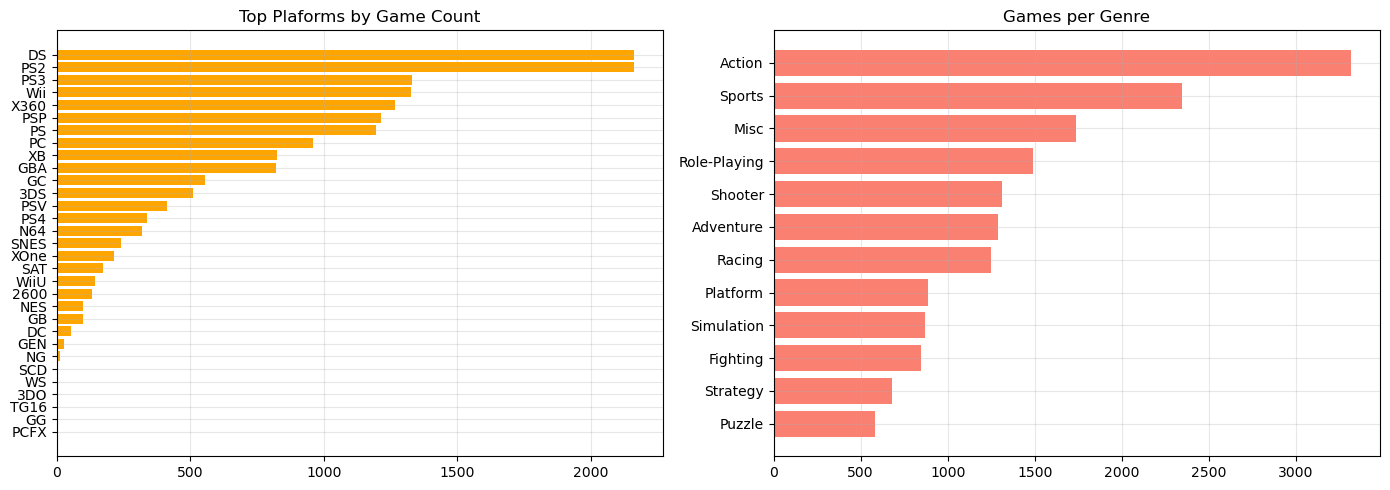

In [19]:
platform_counts = video_games_df['Platform'].value_counts()
genre_counts = video_games_df['Genre'].value_counts()

fig, axes = plt.subplots(1,2, figsize=(14,5))

#Plot 1 - Platforms
axes[0].barh(platform_counts.index, platform_counts.values, color='orange')
axes[0].set_title('Top Plaforms by Game Count')
axes[0].grid(True, alpha=0.3)
axes[0].invert_yaxis()

# Plot 2 - Genres
axes[1].barh(genre_counts.index, genre_counts.values, color='salmon')
axes[1].set_title('Games per Genre')
axes[1].grid(True, alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


- 🌐 On a global scale, the most games were published vor Nintendo DS, shortly followed after Play Station 2.
  


- 🥷 The Action genre is by far the most popular worldwide, followed by Sports.
  


- 💬 Publishers want to make sure to cater to a mix of both popular, in demand genres, but also lean toward a more niche-area as adventure, racing, strategy, if they recognize a growth potantial in certain markets. 

## 3. Business-related Analysis 

### 🔹 A. Top Performer & Rankings

📌 Top 5 games by global sales

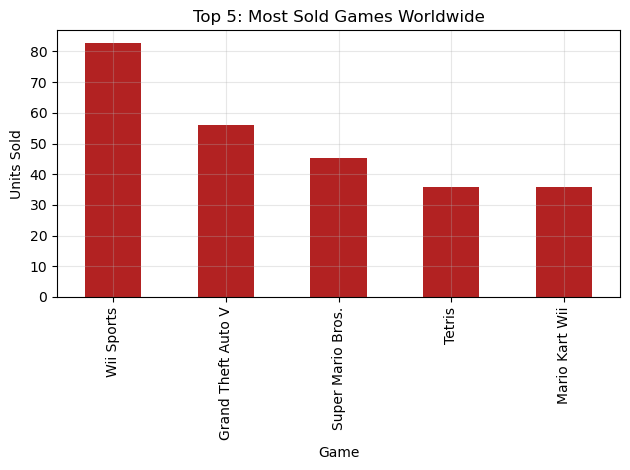

In [24]:
top5_games = video_games_df['Global_Sales'].groupby(video_games_df['Name']).sum().sort_values(ascending=False).head(5)

top5_games.plot(kind='bar', color='firebrick')
plt.title('Top 5: Most Sold Games Worldwide')
plt.xlabel('Game')
plt.ylabel('Units Sold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

📌 Top 5 publishers by total sales

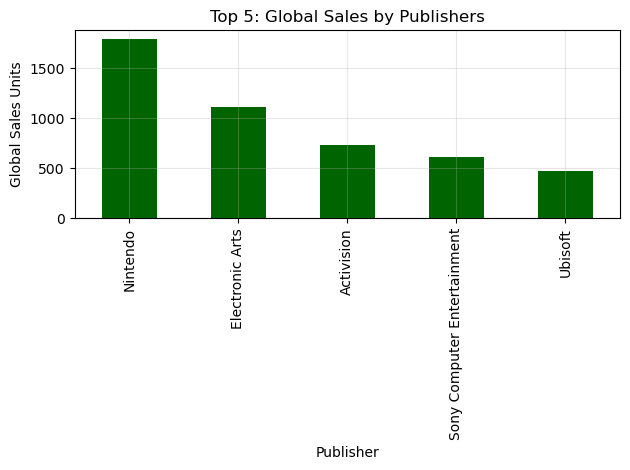

In [26]:
top5_publishers = video_games_df['Global_Sales'].groupby(video_games_df['Publisher']).sum().sort_values(ascending=False).head(5)

top5_publishers.plot(kind='bar', color='darkgreen')
plt.title('Top 5: Global Sales by Publishers')
plt.xlabel('Publisher')
plt.ylabel('Global Sales Units')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- Nintendo is the strongest selling publisher, followed by EA and Activision, Sony and Ubisoft. 

📌 Platforms with the highgest average sales per game

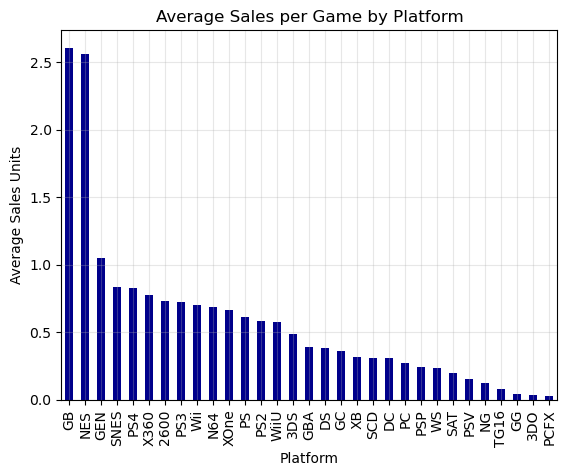

In [29]:
avg_sales_per_platform = video_games_df['Global_Sales'].groupby(video_games_df['Platform']).mean().sort_values(ascending=False)

avg_sales_per_platform.plot(kind='bar', color='darkblue')
plt.title('Average Sales per Game by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Sales Units')
plt.grid(True, alpha=0.3)
plt.tight_layout
plt.show()

- The Nintendo GameBoy is the platform with the highest average revenue per game, with +2.5, followed by Nintendo Entertainment Systems. 
- This is a very important intel for game publishers, as in where to publish on and where to send marketing initiatives. 

### 🔹 B. Regional Market Comparison

📌 Sales comparison across NA, EU, JP, Other, and Global

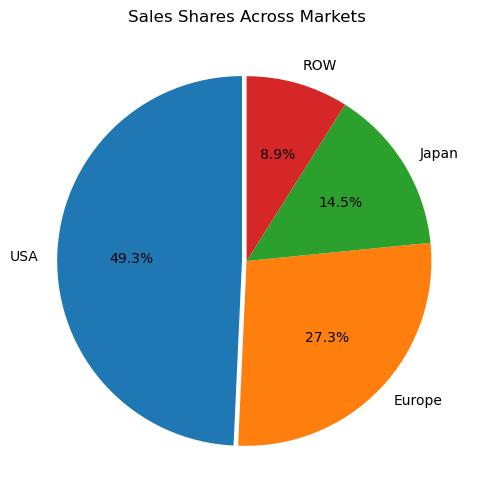

In [33]:
#Sales Share Across Regions
na_sum = video_games_df['NA_Sales'].sum()
eu_sum = video_games_df['EU_Sales'].sum()
jp_sum = video_games_df['JP_Sales'].sum()
row_sum = video_games_df['Other_Sales'].sum()


#Converting to list
labels = ['USA','Europe','Japan','ROW']
values = [na_sum, eu_sum, jp_sum, row_sum]

#Pie Chart
plt.figure(figsize=(6,6))
explode = [0.025,0,0,0]
plt.pie(values, labels = labels, autopct='%1.1f%%', explode=explode, startangle=90)
plt.title('Sales Shares Across Markets')
plt.show()

- The chart shows the dominance of the US market with almost 50% of sales share. 
- In other words: The US market alone sold as many games as the other markets combined.

📌 Share of US vs. JP market over time

<function matplotlib.pyplot.show(close=None, block=None)>

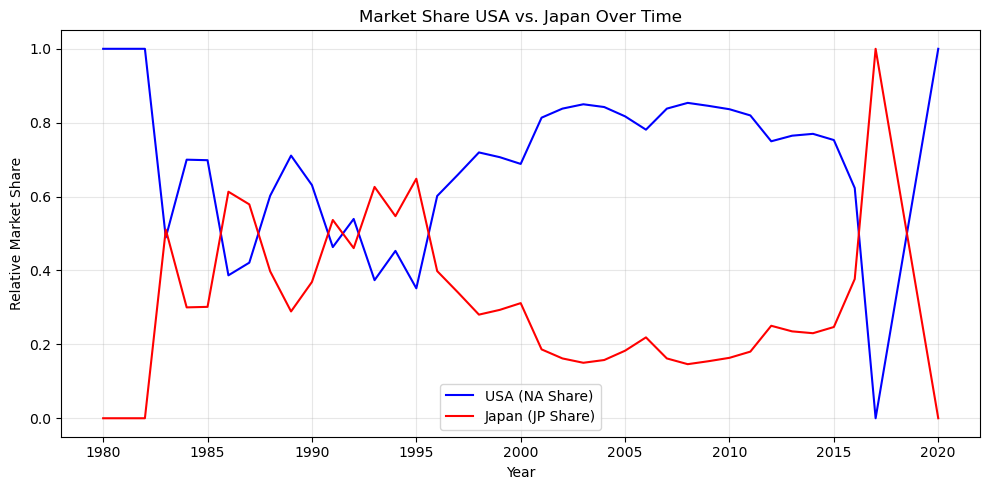

In [36]:
region_trend = video_games_df.groupby('Year')[['NA_Sales','JP_Sales']].sum()
region_trend['Total'] = region_trend.sum(axis=1)
region_trend['NA_Share'] = region_trend['NA_Sales']/region_trend['Total']
region_trend['JP_Share'] = region_trend['JP_Sales']/region_trend['Total']

#Creating line chart
plt.figure(figsize=(10,5))
plt.plot(region_trend.index, region_trend['NA_Share'], label='USA (NA Share)', color='blue')
plt.plot(region_trend.index, region_trend['JP_Share'], label='Japan (JP Share)', color='red')
plt.title('Market Share USA vs. Japan Over Time')
plt.ylabel('Relative Market Share')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show

**Early 80s - Mid 90s**
- Share fluctuates a lot, sometimes with JP dominating (likely due to Nintendo's early dominance: NES, Game Boy)
- Some years show sharp jumps, which likely reflect **missing data** or only a few games being released that year

**Mid 90s - Around 2010**
- USA gains dominance steadily
- Japan's market share stabilizes below 30% with occasional peaks

**Post 2015**
- Extreme values (0% or 100%) appear - this indicates **incomplete data** (e.g. only sales from one region recorded)

📌 Correlation between Japan sales and global sales

In [39]:
correlation_jp_glboal_sales = video_games_df['JP_Sales'].corr(video_games_df['Global_Sales'])
print(f'Correlation between Sales in Japan and Global: {correlation_jp_glboal_sales}')

Correlation between Sales in Japan and Global: 0.6118155181564979


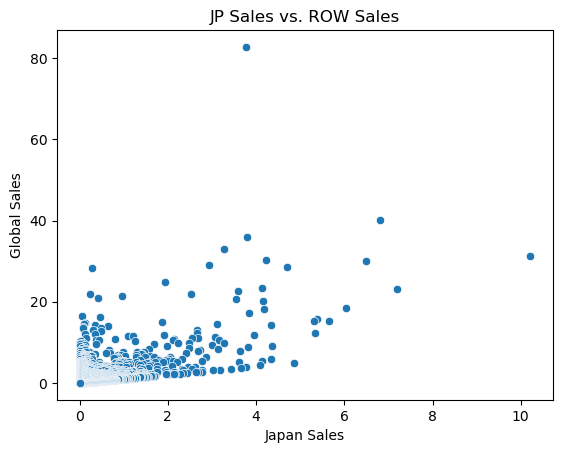

In [40]:
#Correlation: JP vs Global
sns.scatterplot(x=video_games_df['JP_Sales'], y=video_games_df['Global_Sales'])
plt.title('JP Sales vs. ROW Sales')
plt.xlabel('Japan Sales')
plt.ylabel('Global Sales')
plt.show()

- What is interesting here is the presence of strong outliers.
- While the overall correlation between JP and ROW sales is generally positive, there are games that work extremely well in JP but not in ROW and vice versa.
- It would be interesting to compare that cultural uniqueness for other markets as well.

### 🔹 C. Zeitreihen und Trends

📌 Number of games and total sales over time

<function matplotlib.pyplot.show(close=None, block=None)>

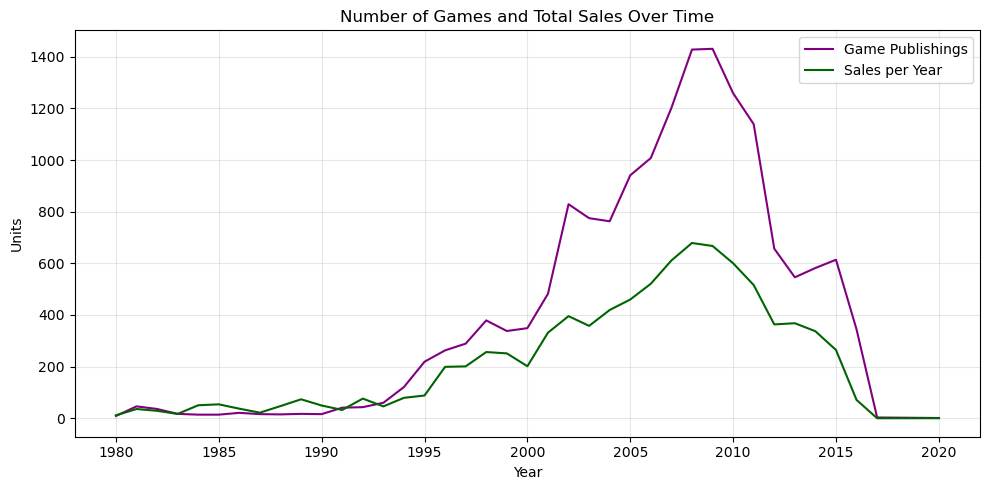

In [44]:
games_per_year = video_games_df.groupby('Year')['Name'].count()
sales_per_year = video_games_df.groupby('Year')['Global_Sales'].sum()

#Creating line chart
plt.figure(figsize=(10,5))
plt.plot(games_per_year, color='purple', label='Game Publishings')
plt.plot(sales_per_year, color='darkgreen', label='Sales per Year')
plt.title('Number of Games and Total Sales Over Time')
plt.ylabel('Units')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show

**Early 90s - 2000s**
- Interesting development as number of publishings gained traction.
- We observe a significant growth in publishings and sales accordingly.

**Early 2000s - ~ 2008**
- The above trend accelerates.
- Amount of publishings skyrocketed until ~2008, but the sales line does not follow accordingly.
- Most likely the games that were published did not sell as expected.

**Post 2008**
- As a consequence for weak selling games, publishings declined drastically in the following years.

📌 Genre popularity trends by decade

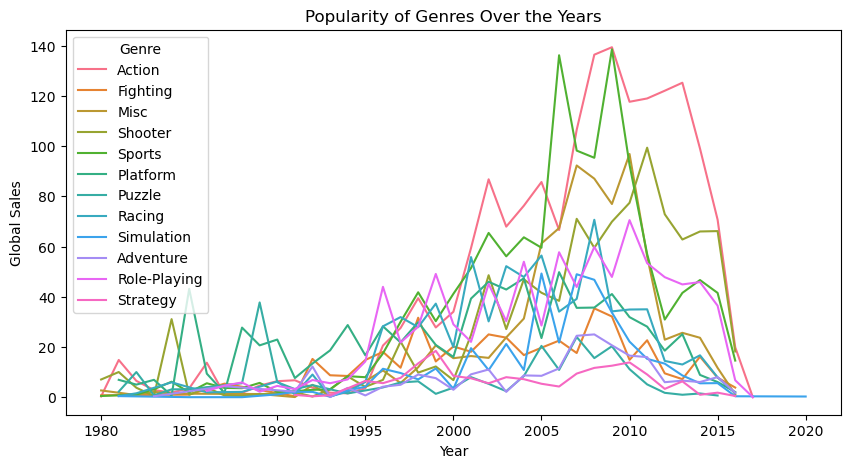

In [47]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=video_games_df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(), palette='husl')
plt.title('Popularity of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

The lineplot delivers an interesting insight:
- Sport games were the most popular ones in 2006, before Action games took over the lead again
- This could be due to the release of a highlight Sports game, such as FIFA World Cup 2006.

💬
- Understanding the genre popularity plays a crucial role in developing games and key markets.
- Publishers want to make sure to consider genre trends ahead of time and anticipate through customer and youth culture analysis, which genres they should cater to.

### 🔹 D. Genre Analysis

📌 Revenue distribution by genre

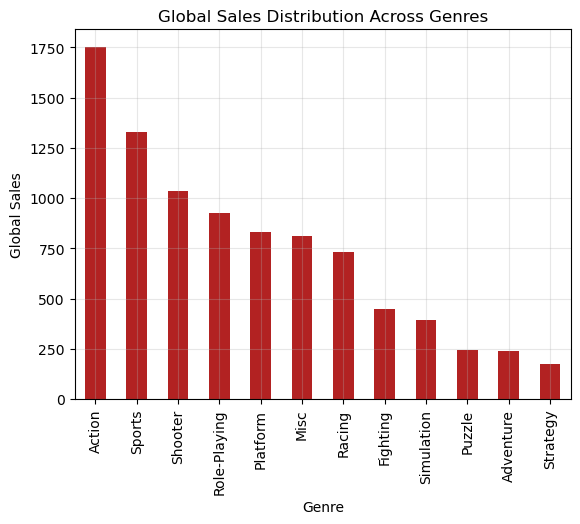

In [51]:
#Global Sales Distribution across genres
global_sales_by_genre = video_games_df['Global_Sales'].groupby(video_games_df['Genre']).sum().sort_values(ascending=False)
global_sales_by_genre.plot(kind='bar', color='firebrick')
plt.title('Global Sales Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.grid(True, alpha=0.3)
plt.show()

📌 Average revenue per game by genre

In [53]:
#Avg global sales by genre 
avg_sales_global = video_games_df['Global_Sales'].groupby(video_games_df['Genre']).mean().sort_values(ascending=False).to_frame()
avg_sales_global

,Global_Sales
Genre,
Platform,0.938341
Shooter,0.791885
Role-Playing,0.623233
Racing,0.586101
Sports,0.567319
Fighting,0.529375
Action,0.528100
Misc,0.465762
Simulation,0.452364


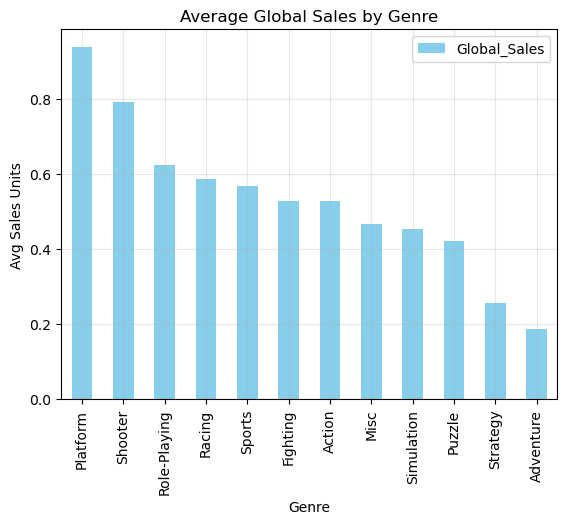

In [54]:
avg_sales_global.plot(kind='bar', color='skyblue')
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Avg Sales Units')
plt.grid(True, alpha=0.3)
plt.show()

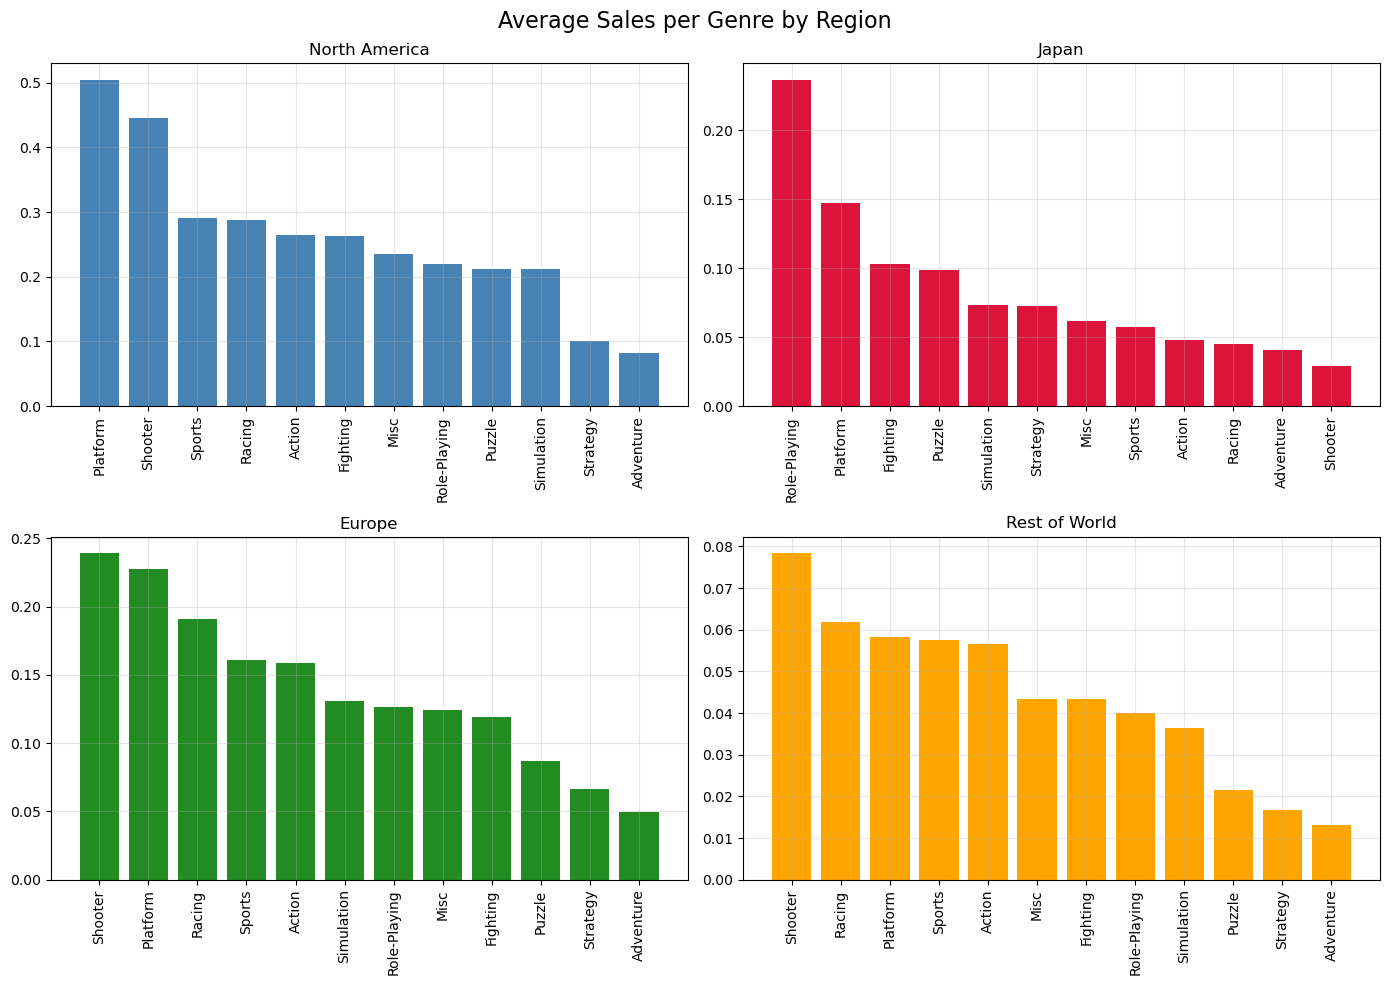

In [92]:
avg_sales_na = video_games_df['NA_Sales'].groupby(video_games_df['Genre']).mean().sort_values(ascending=False)
avg_sales_jp = video_games_df['JP_Sales'].groupby(video_games_df['Genre']).mean().sort_values(ascending=False)
avg_sales_eu = video_games_df['EU_Sales'].groupby(video_games_df['Genre']).mean().sort_values(ascending=False)
avg_sales_row = video_games_df['Other_Sales'].groupby(video_games_df['Genre']).mean().sort_values(ascending=False)

fig, axes = plt.subplots(2,2, figsize=(14,10))
fig.suptitle('Average Sales per Genre by Region', fontsize=16)

#Plot 1 - NA
axes[0,0].bar(avg_sales_na.index, avg_sales_na.values, color='steelblue')
axes[0,0].set_title('North America')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=90)

#Plot 2 - Japan
axes[0,1].bar(avg_sales_jp.index, avg_sales_jp.values, color='crimson')
axes[0,1].set_title('Japan')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=90)

#Plot 3 - Europe
axes[1,0].bar(avg_sales_eu.index, avg_sales_eu.values, color='forestgreen')
axes[1,0].set_title('Europe')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=90)

#Plot 4 - ROW
axes[1,1].bar(avg_sales_row.index, avg_sales_row.values, color='orange')
axes[1,1].set_title('Rest of World')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The visual comparison of average video game sales per genre across four global markets reveals distinct regional prefences:

🇺🇸🇨🇦
- **North America** shows strong preference for **Platform**, **Shooter**, and **Sports** genres.
- Plattform and Shooter are also the most famous genres on a global scale.

🇯🇵
- **Japan**, in contrast, strongly favors **Role-Playing** games, followed by **Platform** and **Fighting**, which - to some degree - differs sharply from the global trend.

🇪🇺
- **Europe** aligns partially with North America, with high high average sales for **Shooters**, **Platform**, and **Racing** genres.

🌐
- **Rest of World** markets also reflect similar preferences to Europe and NA, with **Shooter** games leading.

These differences unterline the importance of regional market insights in gaming strategy - particularly in Japan, where genre preferences diverge significantly from Western markets.
